In [32]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [33]:
f=pd.read_csv('Data_jan.csv',low_memory=False)
test=pd.read_csv('dw_se_postpaid_expiry_detail_list_202211111616.csv')

In [34]:
N_0_count=[]
N_0_Tot=0
temp=(f[f['是否离网']=='N']).drop(['离网日期','是否离网'],axis=1)
for x in temp.columns:
    # if x!='是否携号入网'and x!='是否自动续约':
        N_0_Tot+=len(temp[temp[x]=='N'])
        N_0_count.append([x,len(temp[temp[x]=='N'])])

In [35]:
Y_0_count=[]
Y_0_Tot=0
temp=(f[f['是否离网']=='Y']).drop(['离网日期','是否离网'],axis=1)
for x in temp.columns:
    # if x!='是否携号入网'and x!='是否自动续约':
        Y_0_Tot+=len(temp[temp[x]=='N'])
        Y_0_count.append([x,len(temp[temp[x]=='N'])])

In [36]:
Y_0_df=pd.DataFrame(Y_0_count).set_index(0).sort_index()
N_0_df=pd.DataFrame(N_0_count).set_index(0).sort_index()

(<AxesSubplot: xlabel='0'>, <AxesSubplot: xlabel='0'>)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25658 (\N{CJK UNIFIED IDEOGRAPH-643A}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20837 (\N{CJK UNIFIE

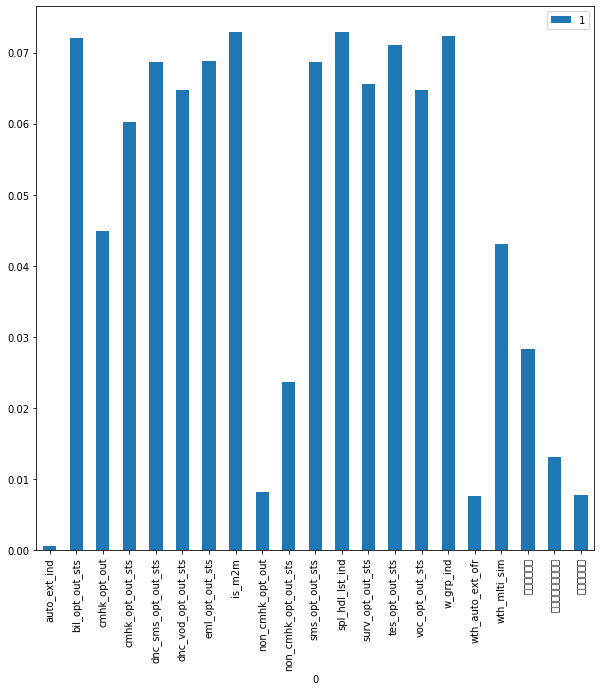

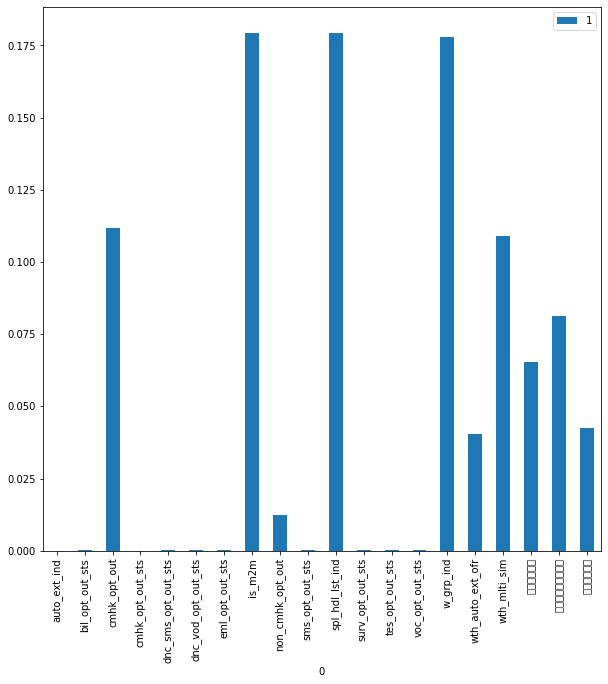

In [37]:
plt.rcParams["figure.figsize"] = [10, 10]
(N_0_df[N_0_df[1]!=0]/N_0_Tot).plot.bar(), (Y_0_df[Y_0_df[1]!=0]/Y_0_Tot).plot.bar()

<AxesSubplot: xlabel='0'>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25658 (\N{CJK UNIFIED IDEOGRAPH-643A}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20837 (\N{CJK UNIFIE

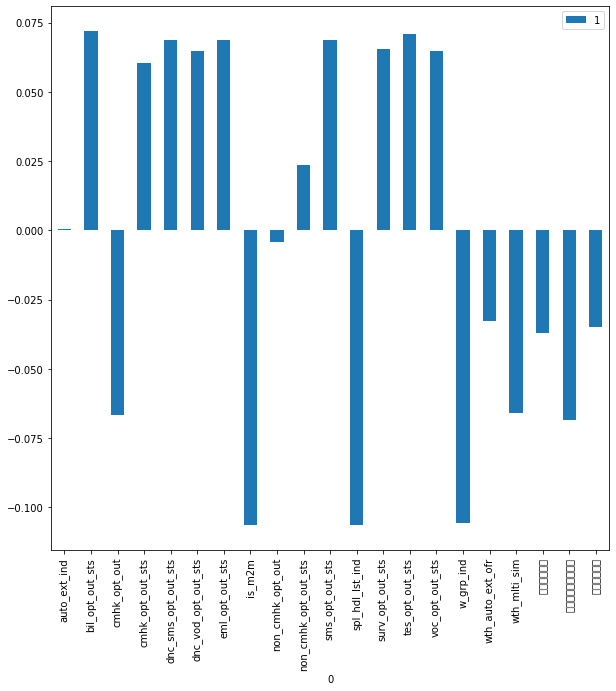

In [38]:
t=N_0_df/N_0_Tot-Y_0_df/Y_0_Tot
plt.rcParams["figure.figsize"] = [10, 10]
(t[t[1]!=0]).plot.bar()

In [53]:
df_col=t[t[1]!=0].sort_values(by=1).index.tolist()
df_col

['is_m2m',
 'spl_hdl_lst_ind',
 'w_grp_ind',
 '是否第一张合约届满',
 'cmhk_opt_out',
 'wth_mlti_sim',
 '是否携号入网',
 '是否自动续约',
 'wth_auto_ext_ofr',
 'non_cmhk_opt_out',
 'auto_ext_ind',
 'non_cmhk_opt_out_sts',
 'cmhk_opt_out_sts',
 'voc_opt_out_sts',
 'dnc_vod_opt_out_sts',
 'surv_opt_out_sts',
 'dnc_sms_opt_out_sts',
 'sms_opt_out_sts',
 'eml_opt_out_sts',
 'tes_opt_out_sts',
 'bil_opt_out_sts']

In [40]:
_0_count_test=[]
# tt=test.drop(['离网日期'],axis=1)
tt=test
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if row[x]=='N':
            temp.append(1)
        else:
            temp.append(0)
    _0_count_test.append(temp)

In [41]:
_0_count_train=[]
# tt=f.drop(['离网日期'],axis=1)
tt=f
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if row[x]=='N':
            temp.append(1)
        else:
            temp.append(0)
    _0_count_train.append(temp)

In [42]:
a=pd.get_dummies(test['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_test=b.to_frame('是否离网')

In [43]:
a=pd.get_dummies(f['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_train=b.to_frame('是否离网')

----------------------------------模型 Set up------------------------------------------

In [44]:
clf = svm.SVC(kernel='linear')

In [45]:
clf.fit(np.array(_0_count_train[0:80000]), y_train.iloc[0:80000]['是否离网'].to_numpy())

SVC(kernel='linear')

In [46]:
y_pred = clf.predict(np.array(_0_count_train[80000:]))
val=y_pred-y_train.iloc[80000:]['是否离网'].to_numpy()
len(np.nonzero(val)[0])

58

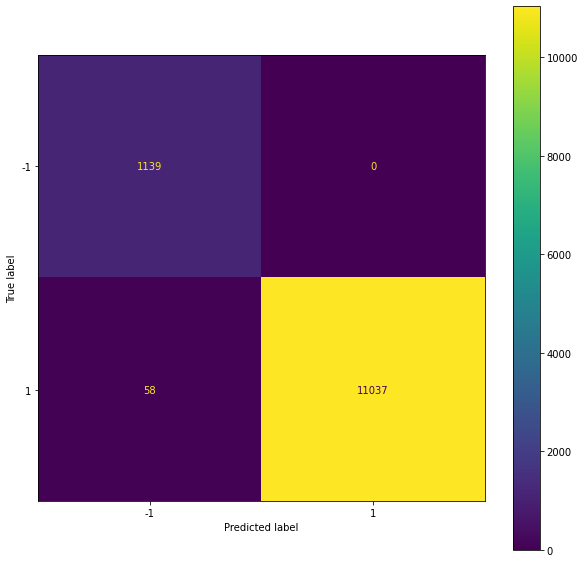

In [47]:
cm = confusion_matrix(y_train.iloc[80000:]['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [48]:
y_pred = clf.predict(np.array(_0_count_test))
val=y_pred-y_test['是否离网'].to_numpy()
(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100

99.39913065712093

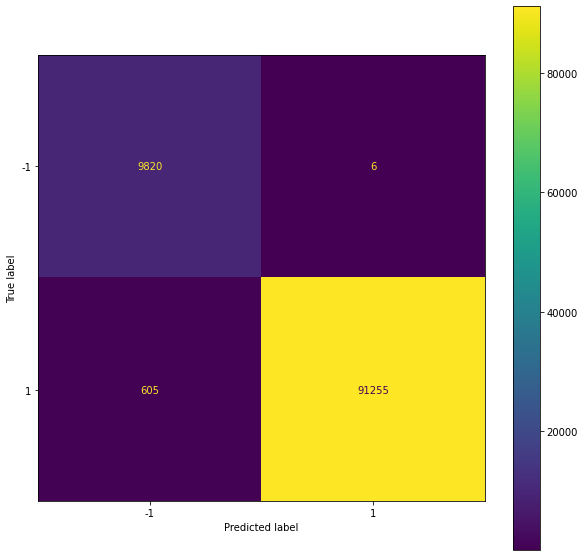

In [49]:
cm = confusion_matrix(y_test['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [50]:
clf.coef_[0]

array([ 1.68753900e-14,  1.68753900e-14,  5.05982355e-04, -3.63860010e-05,
        4.77279403e-05,  3.39949769e-05, -4.57879426e-05, -4.65370973e-04,
       -1.56461060e-04, -3.94071331e-04,  1.13633547e-03,  8.48844902e-04,
        2.00004050e+00,  3.68962992e-04,  3.68962992e-04,  1.99946170e+00,
        6.52236253e-05,  6.52236253e-05,  6.58218034e-04, -1.95683325e-04,
        1.99982265e+00])

In [51]:
df_col

['is_m2m',
 'spl_hdl_lst_ind',
 'w_grp_ind',
 '是否第一张合约届满',
 'cmhk_opt_out',
 'wth_mlti_sim',
 '是否携号入网',
 '是否自动续约',
 'wth_auto_ext_ofr',
 'non_cmhk_opt_out',
 'auto_ext_ind',
 'non_cmhk_opt_out_sts',
 'cmhk_opt_out_sts',
 'voc_opt_out_sts',
 'dnc_vod_opt_out_sts',
 'surv_opt_out_sts',
 'dnc_sms_opt_out_sts',
 'sms_opt_out_sts',
 'eml_opt_out_sts',
 'tes_opt_out_sts',
 'bil_opt_out_sts']

In [52]:
(pd.DataFrame(df_col,columns=['Features']).join(pd.DataFrame(clf.coef_[0],columns=['value']))).to_csv('featuresvmvalue.csv', encoding='utf-8-sig',index=False)